In [5]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [10]:
df=pd.read_csv("incomes.csv")
df.head()

,name,age,inome
0,rob,27,70000
1,michael,29,90000
2,rohan,29,61000
3,ismail,28,60000
4,kory,42,150000


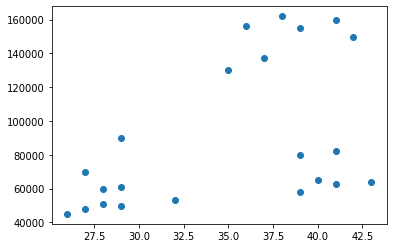

In [13]:
%matplotlib inline
plt.scatter(df.age, df.inome)

In [14]:
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
y_pred=km.fit_predict(df[['age', 'inome']])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [16]:
df['cluster']=y_pred
df

,name,age,inome,cluster
0,rob,27,70000,2
1,michael,29,90000,2
2,rohan,29,61000,0
3,ismail,28,60000,0
4,kory,42,150000,1
5,gautuam,39,155000,1
6,david,41,160000,1
7,andrea,38,162000,1
8,brad,36,156000,1
9,angelina,35,130000,1


No handles with labels found to put in legend.


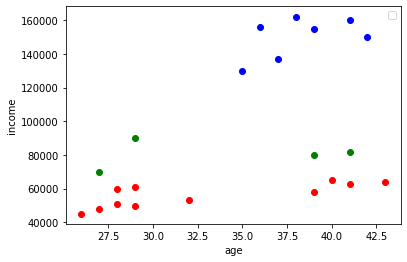

In [20]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.age, df1['inome'], color='red')
plt.scatter(df2.age, df2['inome'], color='blue')
plt.scatter(df3.age, df3['inome'], color='green')

plt.xlabel('age')
plt.ylabel('income')
plt.legend()

In [40]:
scaler=MinMaxScaler()
scaler.fit(df[['inome']])
df[['inome']]=scaler.transform(df[['inome']])
scaler.fit(df[['age']])
df[['age']]=scaler.transform(df[['age']])
df

,name,age,inome,cluster
0,rob,0.058824,0.213675,2
1,michael,0.176471,0.384615,2
2,rohan,0.176471,0.136752,0
3,ismail,0.117647,0.128205,0
4,kory,0.941176,0.897436,1
5,gautuam,0.764706,0.940171,1
6,david,0.882353,0.982906,1
7,andrea,0.705882,1.000000,1
8,brad,0.588235,0.948718,1
9,angelina,0.529412,0.726496,1


In [44]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['age', 'inome']])
y_pred

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [46]:
df['cluster']=y_pred
df

,name,age,inome,cluster
0,rob,0.058824,0.213675,2
1,michael,0.176471,0.384615,2
2,rohan,0.176471,0.136752,2
3,ismail,0.117647,0.128205,2
4,kory,0.941176,0.897436,1
5,gautuam,0.764706,0.940171,1
6,david,0.882353,0.982906,1
7,andrea,0.705882,1.000000,1
8,brad,0.588235,0.948718,1
9,angelina,0.529412,0.726496,1


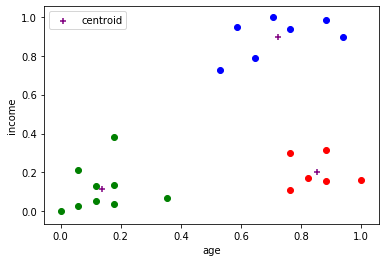

In [50]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.age, df1['inome'], color='red')
plt.scatter(df2.age, df2['inome'], color='blue')
plt.scatter(df3.age, df3['inome'], color='green')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='+', label='centroid')

plt.xlabel('age')
plt.ylabel('income')
plt.legend()

In [48]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

In [51]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['age', 'inome']])
    sse.append(km.inertia_)

In [52]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.36877340764405886,
 0.28184797443662374,
 0.21878010893330443,
 0.1729962193245546,
 0.1326541982724516,
 0.11123550695239094]

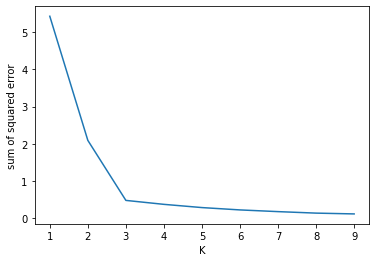

In [57]:
plt.xlabel('K')
plt.ylabel('sum of squared error')
plt.plot(k_rng, sse)